# **Improving Employee Retention By Predicting Employee Attrition Using Machine Learning**

---
# Business Understanding
---

Human resources (HR) represent the fundamental assets that require effective management for the company to achieve its business goals efficiently. In this context, we are addressing a challenge related to human resources within the company. Our primary objective is to understand how to retain employees within the current organization, recognizing that turnover incurs increased costs for employee recruitment and training, especially for those who have recently joined. Identifying the key factors contributing to employee dissatisfaction allows the company to proactively address these issues by implementing targeted programs that directly tackle employee concerns.

---
# Import Library
---

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.graph_objects as go
import plotly.express as px
import math
from imblearn import over_sampling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
print (pd.options.display.max_columns)
pd.options.display.max_columns = 100
print (pd.options.display.max_columns)

20
100


---
# Load Data
---

In [3]:
df = pd.read_excel('dataset/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,NaN,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


---
# Stage 1: Data Preprocessing
---

## Univariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

According to the data frame information, several features exhibit missing values, and there is a need to adjust the data types for ease of processing. Here are the details:

**Features with Missing Values:**
- SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKetidakhadiran, IkutProgramLOP, AlasanResign contain missing values.

**Features Requiring Datatype Change:**
- TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign will be converted to datetime datatype for better processing.

In [5]:
categorical = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
numerical = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']

In [6]:
df[categorical].describe()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,TingkatPendidikan,PernahBekerja,AlasanResign
count,287,287,287,287,287,287,287,287,287,287,221
unique,5,2,3,14,3,5,5,9,3,2,11
top,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,Sarjana,1,masih_bekerja
freq,132,167,217,109,169,85,72,85,176,286,132


There are several categorical features, namely StatusKepegawaian, JenjangKarir, and PernahBekerja, that exhibit a significant number of top-category differences compared to others. These features warrant further analysis to determine whether this feature is good or not.

In [7]:
for i in categorical:
    print('=======================================================================================================')
    print(i, ':', len(df[i].unique()))
    print(i, ':', df[i].unique())

StatusPernikahan : 5
StatusPernikahan : ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-']
JenisKelamin : 2
JenisKelamin : ['Pria' 'Wanita']
StatusKepegawaian : 3
StatusKepegawaian : ['Outsource' 'FullTime' 'Internship']
Pekerjaan : 14
Pekerjaan : ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer']
JenjangKarir : 3
JenjangKarir : ['Freshgraduate_program' 'Senior_level' 'Mid_level']
PerformancePegawai : 5
PerformancePegawai : ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang']
AsalDaerah : 5
AsalDaerah : ['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat']
HiringPlatform : 9
HiringPlatform : ['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder'
 'Di

Based on the unique values in categorical features, the following improvements will be made to the data:

- **StatusPernikahan:**
  - Unique values '-' and 'lainnya' will be changed to 'unknown' for standardization.

- **PernahBekerja:**
  - The feature will be dropped as the unique values do not provide meaningful information.


In [8]:
df[numerical].describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


Based on the analysis of numerical features, all features exhibit normal values, and although some features display skewness, no corrective actions will be taken. This decision suggests that the overall distribution and characteristics of the numerical features are considered acceptable, and no adjustments are deemed necessary at this point.

In [9]:
# Changing datatype into datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], format='%Y-%m-%d')
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], format='%Y-%m-%d')
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], format='%Y-%m-%d')
df['TanggalResign'].replace('-', np.nan, inplace=True)
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], format='%Y-%m-%d')

# Change value in StatusPernikahan
df['StatusPernikahan'].replace(['-', 'Lainnya'], 'unknown', inplace=True)

# Drop not meaningful columns
df.drop(['PernahBekerja'], axis = 1, inplace = True)

## Handling Missing Value

In [10]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                     

Based on the quantity of missing values in each column, the following actions will be taken:
- 'IkutProgramLOP' will be dropped due to the substantial number of missing values.
- 'TanggalResign' is set to be replaced with 'Masih Bekerja'.
- 'AlasanResign' is set to be replaced with 'unknown'.
- 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', and 'JumlahKetidakhadiran' will be replaced with the median. Given the limited data, this approach is suggested to minimize data loss.

In [11]:
df.drop(['IkutProgramLOP'], axis = 1, inplace = True)
df["AlasanResign"].fillna("unknown", inplace = True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace = True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace = True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace = True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace = True)

## Handling Duplicated Data

In [12]:
df.duplicated().sum()

0

There is no duplicate value.

## Feature Engineering

Date data can be challenging to use directly in machine learning models, so a transformation will be applied to make it more useful. Specifically, the date data will be extracted to create two new features:

1. **Umur_pd_Penilaian:**
   - This feature will represent the age of the employee at the time of the 'penilaian karyawan'.

2. **Months_Hiring_Penilaian (Months_between_Hiring_and_Assessment):**
   - This feature will represent the number of Months between the hiring date and the 'penilaian karyawan' date.

3. **Tahun_Hiring**
   - This feature is obtained from TanggalHiring

4. **Tahun_Resign**
   - This feature is obtained from TanggalResign

5. **Resign**
   - This feature is obtained from TanggalResign, if the value is not null so will be filled with 1 and if null will be filled with 0.
   
These new features aim to provide more meaningful and model-friendly representations of the time-related information in the dataset.

In [13]:
df['Umur_pd_Penilaian'] = df['TanggalPenilaianKaryawan'].dt.year - df['TanggalLahir'].dt.year
df['Months_Hiring_Penilaian'] = ((df['TanggalPenilaianKaryawan']-df['TanggalHiring'])/np.timedelta64(1, 'M'))
df['Tahun_Hiring'] = df['TanggalHiring'].dt.year
df['Tahun_Resign'] = df['TanggalResign'].dt.year
df['Umur_pd_Penilaian'] = df['Umur_pd_Penilaian'].astype(int)
df['Months_Hiring_Penilaian'] = df['Months_Hiring_Penilaian'].astype(int)
df['Resign'] = df.apply(lambda x: 0 if pd.isnull(x['TanggalResign']) else 1, axis=1)
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Umur_pd_Penilaian,Months_Hiring_Penilaian,Tahun_Hiring,Tahun_Resign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,44,60,2011,NaN,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,36,71,2014,2018.0,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,42,58,2011,2014.0,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,41,70,2014,NaN,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,46,73,2013,2018.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,unknown,1973-12-08,2011-09-26,2016-03-01,NaT,43,52,2011,NaN,0
283,yearningPorpoise4,106254,unknown,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,46,79,2013,2017.0,1
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,51,72,2013,2018.0,1
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,33,34,2011,2018.0,1


The dataset will be done for deeper analysis, steps like feature encoding, scaling, splitting, and similar processes will be deferred to a later stage.

---
# Stage 2: Annual Report On Employee Number Changes
---

- Number of Hiring and Resign employee based on year

In [14]:
df_hiring = df.groupby(['Tahun_Hiring']).agg({
    'Tahun_Hiring' : ['count']
}).reset_index()
df_hiring.columns = ['Tahun', 'Jumlah Hiring']
df_hiring

,Tahun,Jumlah Hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [15]:
df_resign = df.groupby(['Tahun_Resign']).agg({
    'Tahun_Resign' : ['count']
}).reset_index()
df_resign.columns = ['Tahun', 'Jumlah Resign']
df_resign['Tahun'] = df_resign['Tahun'].astype(int)
df_resign

,Tahun,Jumlah Resign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


- Join Table Hiring and Resign

In [16]:
df_Number_Changes = pd.merge(df_hiring, df_resign, on='Tahun', how='outer')
df_Number_Changes.fillna(0, inplace=True)
df_Number_Changes

,Tahun,Jumlah Hiring,Jumlah Resign
0,2006,1.0,0.0
1,2007,2.0,0.0
2,2008,2.0,0.0
3,2009,7.0,0.0
4,2010,8.0,0.0
5,2011,76.0,0.0
6,2012,41.0,0.0
7,2013,43.0,5.0
8,2014,56.0,12.0
9,2015,31.0,8.0


- The total number of employees who resigned, those who still remain, and the changes each year.

In [17]:
df_Number_Changes['Pertumbuhan Karyawan'] = df_Number_Changes.apply(lambda x: x['Jumlah Hiring'] - x['Jumlah Resign'], axis=1)
listPertumbuhan = list(df_Number_Changes['Pertumbuhan Karyawan'])
total = [listPertumbuhan[0]]
for i in range(1, len(listPertumbuhan)):
    total.append(total[i-1]+listPertumbuhan[i])
df_Number_Changes['Total Karyawan'] = total
df_Number_Changes

,Tahun,Jumlah Hiring,Jumlah Resign,Pertumbuhan Karyawan,Total Karyawan
0,2006,1.0,0.0,1.0,1.0
1,2007,2.0,0.0,2.0,3.0
2,2008,2.0,0.0,2.0,5.0
3,2009,7.0,0.0,7.0,12.0
4,2010,8.0,0.0,8.0,20.0
5,2011,76.0,0.0,76.0,96.0
6,2012,41.0,0.0,41.0,137.0
7,2013,43.0,5.0,38.0,175.0
8,2014,56.0,12.0,44.0,219.0
9,2015,31.0,8.0,23.0,242.0


- Plot

In [18]:
fig = go.Figure()
fig.add_trace(go.Waterfall(x = df_Number_Changes["Tahun"],
                          y = df_Number_Changes["Pertumbuhan Karyawan"],
                           connector = {"line":{"dash":"dot"}}, 
                           textposition = "outside",
                           text = df_Number_Changes["Pertumbuhan Karyawan"].tolist(),
                           orientation = "v"  
                          ))
fig.update_layout(title = "Pertumbuhan Karyawan Tiap Tahun")
fig.update_xaxes(range = (2006, 2020), title = "Tahun")
fig.update_yaxes(range = (0, 300), title = "Pertumbuhan Karyawan")
fig.update_layout(
    margin=dict(l=50, r=30, t=50, b=50),
)
fig.show()

From the plot, the employee count has shown an increase from 2006 to 2016, with a significant increase observed between 2011 and 2015, suggesting a period of significant expansion for the company. However, a decrease in the number of employees is evident from 2017 to 2020, a decrease that warrants special attention as it may impact the company's overall performance.

---
# Stage 3: Resign Reason Analysis For Employee Attrition Management Strategy
---

- Number of resign and not yet resign based on job

In [19]:
df[df['Tahun_Resign'].isnull()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Umur_pd_Penilaian,Months_Hiring_Penilaian,Tahun_Hiring,Tahun_Resign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,44,60,2011,NaN,0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,41,70,2014,NaN,0
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,3,4.0,6.0,0.0,10.0,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,NaT,40,39,2016,NaN,0
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,NaT,41,60,2014,NaN,0
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,masih_bekerja,1983-08-24,2013-07-08,2020-01-14,NaT,37,76,2013,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,peacefulChamois3,106257,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,13.0,+6282208741xxx,peacefulChamois3574@icloud.com,Doktor,unknown,1980-04-18,2013-07-08,2020-01-22,NaT,40,77,2013,NaN,0
280,anxiousTeal2,111378,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Employee_Referral,3,5.0,7.0,0.0,16.0,+6289567915xxx,anxiousTeal2015@gmail.com,Sarjana,unknown,1984-09-16,2014-11-10,2020-01-04,NaT,36,60,2014,NaN,0
281,anxiousWasp6,100628,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,2,5.0,7.0,0.0,15.0,+6281806218xxx,anxiousWasp6788@outlook.com,Sarjana,unknown,1983-09-04,2017-02-15,2020-01-23,NaT,37,34,2017,NaN,0
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,unknown,1973-12-08,2011-09-26,2016-03-01,NaT,43,52,2011,NaN,0


In [20]:
df_numberResign = df[df['Tahun_Resign'].notnull()].groupby(['Pekerjaan']).agg({
    'Pekerjaan' : ['count']
}).reset_index()
df_numberResign.columns = ['Pekerjaan', 'Jumlah Resign']
df_numberResign

,Pekerjaan,Jumlah Resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [21]:
df_numberStay = df[df['Tahun_Resign'].isnull()].groupby(['Pekerjaan']).agg({
    'Pekerjaan' : ['count']
}).reset_index()
df_numberStay.columns = ['Pekerjaan', 'Jumlah Bertahan']
df_numberStay

,Pekerjaan,Jumlah Bertahan
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [22]:
df_Resign_Stay = pd.merge(df_numberResign, df_numberStay, on='Pekerjaan', how='outer')
df_Resign_Stay.fillna(0, inplace=True)
df_Resign_Stay['Jumlah Resign'] = df_Resign_Stay['Jumlah Resign'].astype(int)
df_Resign_Stay['Jumlah Bertahan'] = df_Resign_Stay['Jumlah Bertahan'].astype(int)
df_Resign_Stay

,Pekerjaan,Jumlah Resign,Jumlah Bertahan
0,Data Analyst,8,8
1,Data Engineer,3,7
2,Product Design (UI & UX),9,15
3,Product Manager,6,11
4,Software Engineer (Android),7,17
5,Software Engineer (Back End),28,81
6,Software Engineer (Front End),28,44
7,DevOps Engineer,0,3
8,Digital Product Manager,0,2
9,Machine Learning Engineer,0,2


- Number of employees and percentage of resigned employees and stays employees

In [23]:
df_Resign_Stay['Total Karyawan'] = df_Resign_Stay.apply(lambda x: x['Jumlah Resign'] + x['Jumlah Bertahan'], axis=1)
df_Resign_Stay['Resign Rate'] = df_Resign_Stay.apply(lambda x: float("{:.2f}".format(x['Jumlah Resign']/x['Total Karyawan']*100)), axis=1)
df_Resign_Stay['Stay Rate'] = df_Resign_Stay.apply(lambda x: float("{:.2f}".format(x['Jumlah Bertahan']/x['Total Karyawan']*100)), axis=1)
df_Resign_Stay

,Pekerjaan,Jumlah Resign,Jumlah Bertahan,Total Karyawan,Resign Rate,Stay Rate
0,Data Analyst,8,8,16,50.00,50.00
1,Data Engineer,3,7,10,30.00,70.00
2,Product Design (UI & UX),9,15,24,37.50,62.50
3,Product Manager,6,11,17,35.29,64.71
4,Software Engineer (Android),7,17,24,29.17,70.83
5,Software Engineer (Back End),28,81,109,25.69,74.31
6,Software Engineer (Front End),28,44,72,38.89,61.11
7,DevOps Engineer,0,3,3,0.00,100.00
8,Digital Product Manager,0,2,2,0.00,100.00
9,Machine Learning Engineer,0,2,2,0.00,100.00


- Plot percentage of resigning and remaining employees

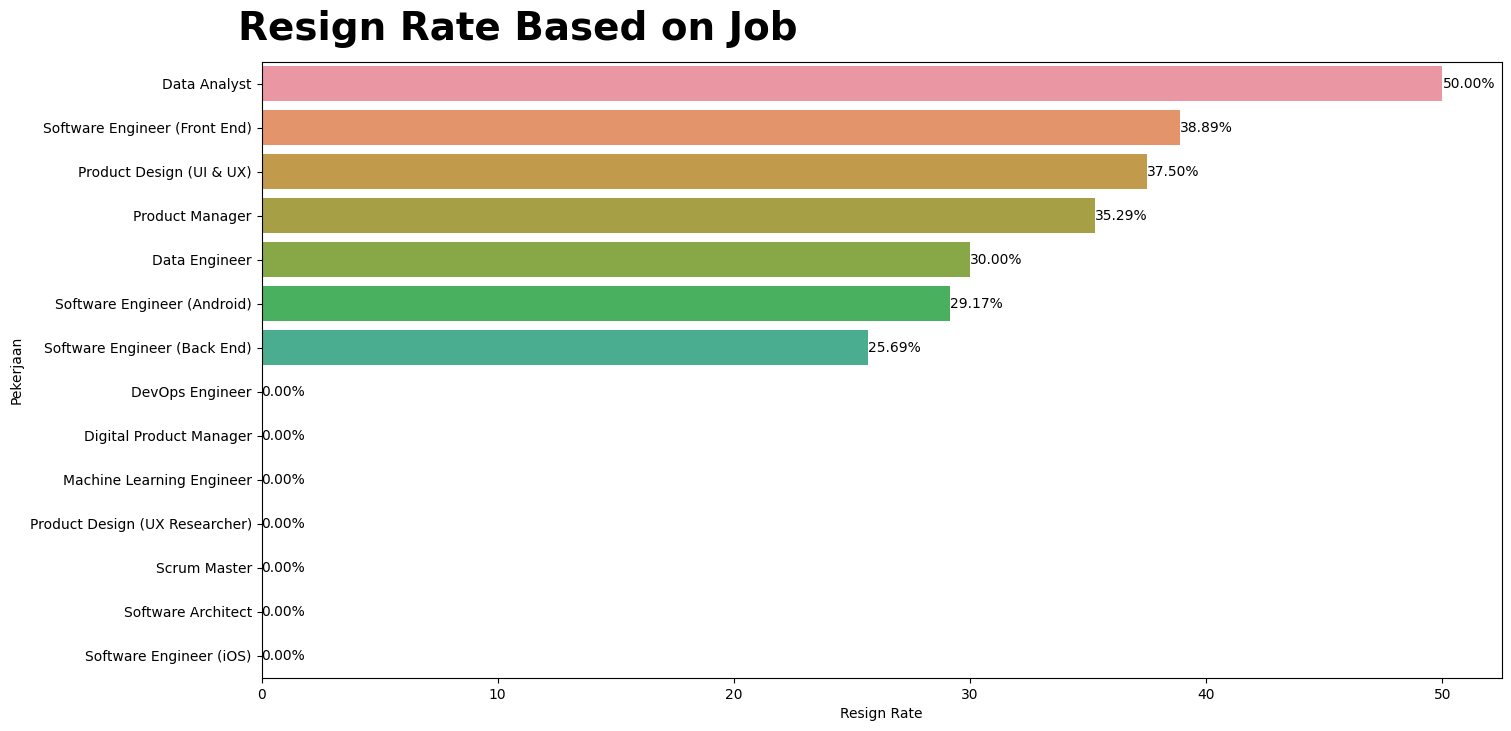

In [24]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='Pekerjaan', x='Resign Rate', data=df_Resign_Stay, orient='h', order=df_Resign_Stay.sort_values('Resign Rate', ascending = False).Pekerjaan)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')
plt.text(x = -1, y = -1, 
        s = "Resign Rate Based on Job",
        fontsize = 28, weight = 'bold')
plt.show()

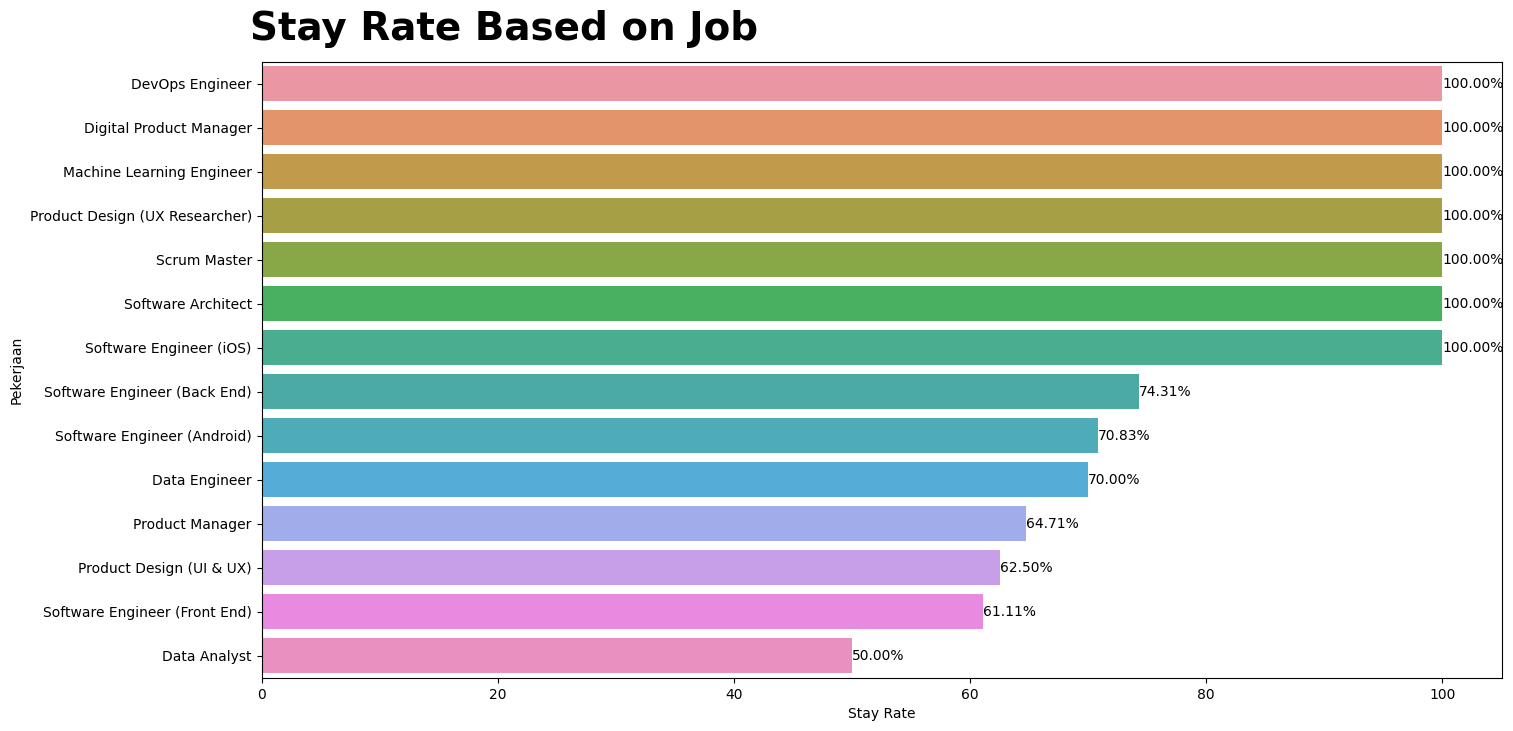

In [25]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='Pekerjaan', x='Stay Rate', data=df_Resign_Stay, orient='h', order=df_Resign_Stay.sort_values('Stay Rate', ascending = False).Pekerjaan)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')
plt.text(x = -1, y = -1, 
        s = "Stay Rate Based on Job",
        fontsize = 28, weight = 'bold')
plt.show()

According to the provided plot, the data analyst role has the highest resignation rate at 50%, while roles such as DevOps Engineer, Digital Product Manager, Machine Learning Engineer, Product Design (UX Researcher), Scrum Master, Software Architect, and Software Engineer (iOS) have no resigned employees.

- Number of employees who resigned based on career level, employee performance, and reasons for resigning on the Highest resignation rate (Data Analyst)

In [26]:
df_dataAnalyst = df[df['Pekerjaan'] == "Data Analyst"]
df_dataAnalyst

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Umur_pd_Penilaian,Months_Hiring_Penilaian,Tahun_Hiring,Tahun_Resign,Resign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,36,71,2014,2018.0,1
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,NaT,41,60,2014,NaN,0
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,17.0,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,49,57,2012,2017.0,1
54,adoringCardinal9,101188,unknown,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,LinkedIn,4,5.0,0.0,0.0,10.0,+6289841872xxx,adoringCardinal9745@yahoo.com,Sarjana,masih_bekerja,1987-05-21,2015-03-30,2020-02-07,NaT,33,57,2015,NaN,0
78,somberCod8,110312,Bercerai,Pria,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,Employee_Referral,4,4.0,0.0,0.0,19.0,+6289954216xxx,somberCod8452@icloud.com,Sarjana,masih_bekerja,1983-02-18,2013-09-30,2020-02-25,NaT,37,75,2013,NaN,0
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,7.0,0.0,2.0,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,33,38,2016,2017.0,1
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3.0,0.0,0.0,20.0,+6285960968xxx,brainyFish3571@hotmail.com,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-02-20,2018-06-08,30,22,2012,2018.0,1
105,scornfulBoa6,111235,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Timur,Indeed,3,3.0,0.0,0.0,1.0,+6281335006xxx,scornfulBoa6602@yahoo.com,Sarjana,unknown,1970-04-24,2013-05-13,2020-01-14,NaT,50,78,2013,NaN,0
106,troubledThrushe9,101192,unknown,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3.0,0.0,0.0,20.0,+6281801928xxx,troubledThrushe9146@proton.com,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-01-30,2014-08-19,33,83,2013,2014.0,1
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,10.0,+6283373813xxx,jealousIguana3026@gmail.com,Sarjana,toxic_culture,1976-09-22,2015-03-30,2020-01-21,2014-08-19,44,56,2015,2014.0,1


In [27]:
df_dataAnalyst_resign = df_dataAnalyst[df_dataAnalyst['Tahun_Resign'].notnull()].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg({
    'JenjangKarir' : ['count']
}).reset_index()
df_dataAnalyst_resign.columns = ['JenjangKarir', 'PerformancePegawai', 'AlasanResign', 'Total Resign']
df_dataAnalyst_resign

,JenjangKarir,PerformancePegawai,AlasanResign,Total Resign
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


- Plot of df_dataAnalyst_resign

In [28]:
fig = px.sunburst(df_dataAnalyst_resign, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='Total Resign')
fig.update_layout(
    margin=dict(l=0, r=0, t=10, b=10),
)
fig.show()

According to the Sunburst Charts, resignations from the data analyst role are all of them is Freshgraduate_program, and all of these resignations are attributed to issues related to toxic culture or internal conflict. This underscores the need for the company to address and rectify concerns related to workplace culture to create a more comfortable and conducive working environment.

---
# Stage 4: Build An Automated Resignation Behavior Prediction Using Machine Learning
---

## Data Preprocessing 2

- Checking Missing Value

In [29]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
Umur_pd_Penilaian                 

Because Tanggal Resign and Tahun Resign are no longer needed, these columns will be dropped

In [30]:
df.drop(['TanggalResign', 'Tahun_Resign'], axis = 1, inplace = True)

## Handling Outlier

In [31]:
numerical.remove('IkutProgramLOP')
numerical.extend(['Umur_pd_Penilaian', 'Months_Hiring_Penilaian', 'Tahun_Hiring'])

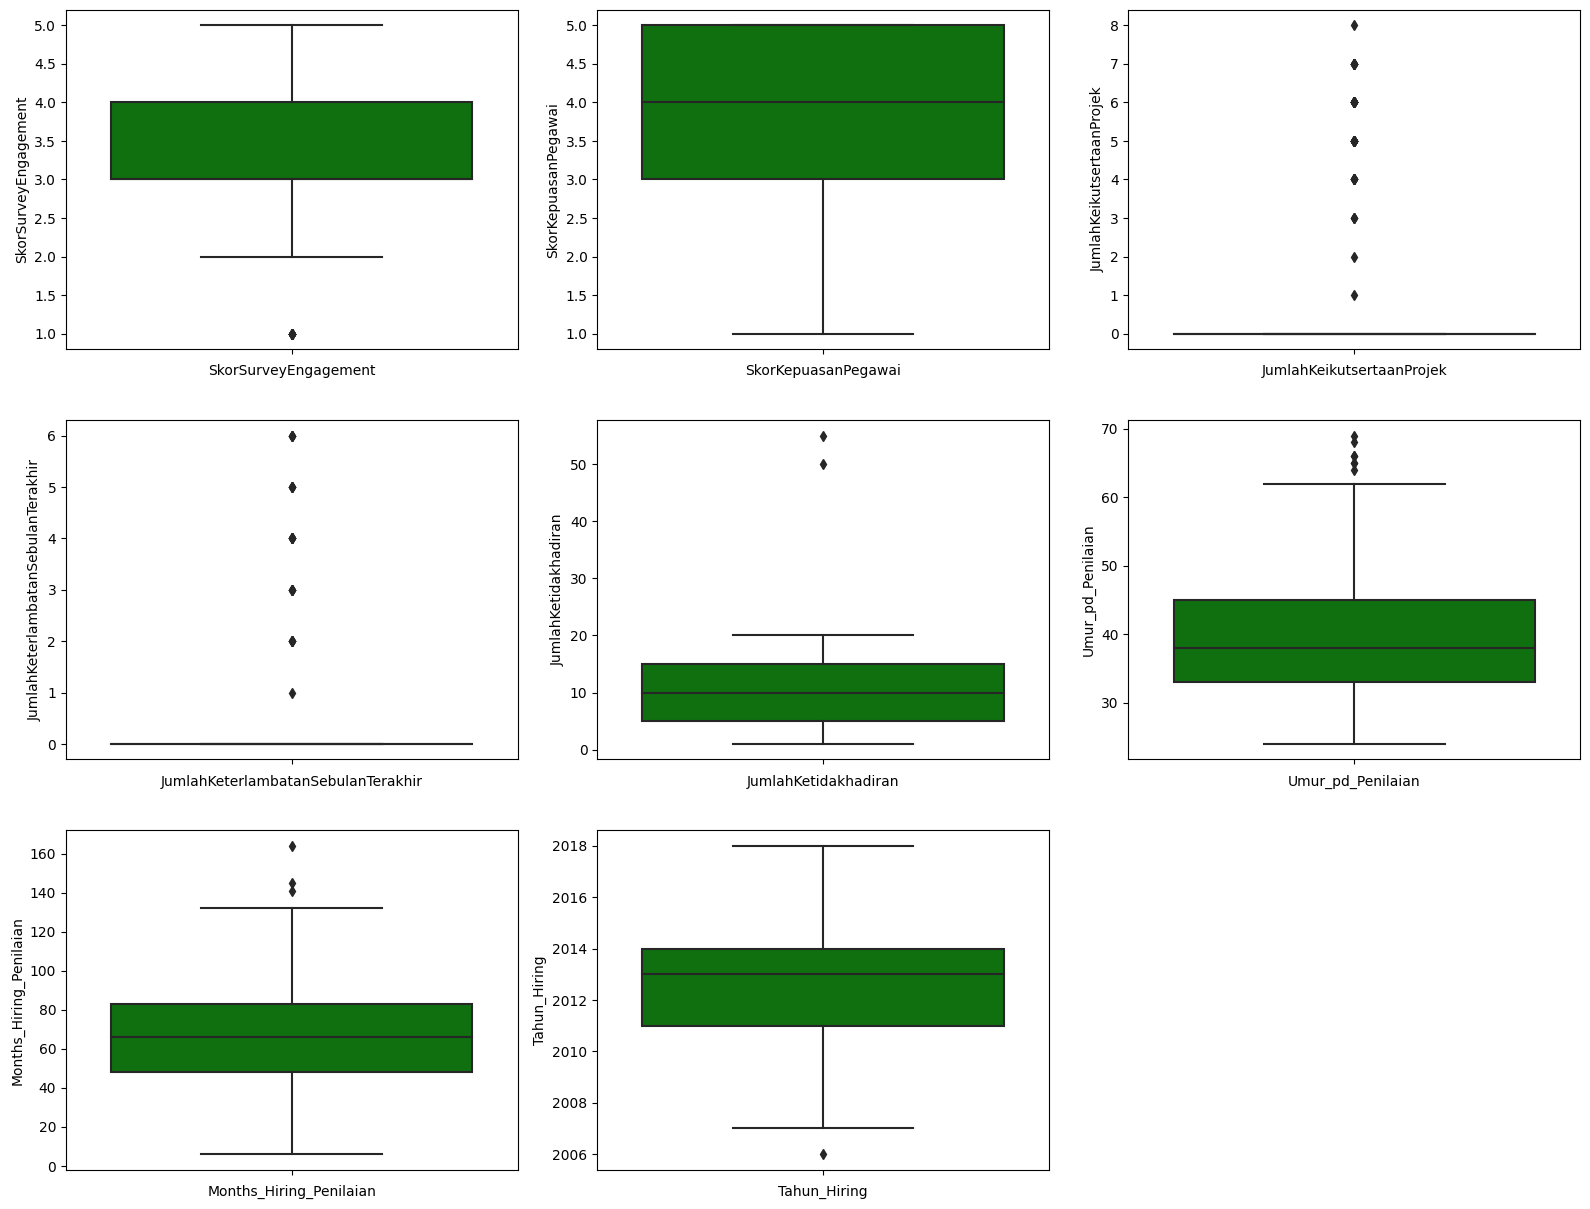

In [32]:
plt.figure(figsize=(16,16))
for i in range(len(numerical)):
  ax1 = plt.subplot(math.ceil(len(numerical)/2), 3, i+1)
  ax1 = sns.boxplot(y = numerical[i], data = df, color = 'green')
  ax1 = plt.xlabel(numerical[i])
  plt.tight_layout(h_pad=3.0)

Although abnormal outliers exist in the features, the small size of the dataset prohibits the exclusion of such data, as every piece of information in a small dataset is deemed important. To address this challenge, robust models like Decision Tree, Random Forest, and others will be employed. These models are known for their resilience to outliers, providing a suitable approach for handling the peculiarities of the dataset without compromising the valuable information it contains.

## Feature Selection 

In [33]:
dropFeature = ['Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'HiringPlatform']
df.drop(dropFeature, axis = 1, inplace = True)

## Data Transformation

Categorical data will undergo feature encoding to transform it into a format suitable for input into machine learning models. Regarding numerical data, as multiple machine learning models will be employed in this project as a comparison, feature scaling using MinMaxScaler will be implemented. This step aims to standardize the numerical features, ensuring compatibility with various machine learning algorithms.

### Categorical Data

In [34]:
categorical.remove('PernahBekerja')
categorical.remove('HiringPlatform')

In [35]:
for i in categorical:
    print('=======================================================================================================')
    print(i, ':', len(df[i].unique()))
    print(i, ':', df[i].unique())

StatusPernikahan : 4
StatusPernikahan : ['Belum_menikah' 'Menikah' 'Bercerai' 'unknown']
JenisKelamin : 2
JenisKelamin : ['Pria' 'Wanita']
StatusKepegawaian : 3
StatusKepegawaian : ['Outsource' 'FullTime' 'Internship']
Pekerjaan : 14
Pekerjaan : ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer']
JenjangKarir : 3
JenjangKarir : ['Freshgraduate_program' 'Senior_level' 'Mid_level']
PerformancePegawai : 5
PerformancePegawai : ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang']
AsalDaerah : 5
AsalDaerah : ['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat']
TingkatPendidikan : 3
TingkatPendidikan : ['Magister' 'Sarjana' 'Doktor']
AlasanResign : 12
AlasanResign : ['ma

Based on the values in the categorical features, 'JenisKelamin', 'JenjangKarir', 'PerformancePegawai', and 'TingkatPendidikan' will undergo label encoding since they either have only 2 unique values or the values are hierarchical.

On the other hand, 'StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', and 'AlasanResign' do not meet the criteria for label encoding. These columns will be subjected to one-hot encoding to appropriately represent their distinct categorical values.

- One Hot Encoding

In [36]:
df['Pekerjaan'].value_counts()

Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64

In [37]:
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               132
unknown                      66
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

Considering the large number of distinct values in the features Pekerjaan and AlasanResign (more than 5), a transformation will be applied to retain only the top 5 unique values. The remaining values will be consolidated and transformed into 'Other' to streamline and simplify the representation of these categorical features.

In [38]:
df['Pekerjaan'].replace(['Data Analyst', 'Data Engineer', 'Scrum Master', 'Software Engineer (iOS)', 'DevOps Engineer', 'Digital Product Manager', 'Machine Learning Engineer', 'Product Design (UX Researcher)', 'Software Architect'], 'Other', inplace=True)
df['AlasanResign'].replace(['toxic_culture', 'leadership', 'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)', 'apresiasi', 'unknown'], 'Other', inplace=True)

In [39]:
df = pd.get_dummies(df, columns = ['StatusPernikahan'], dtype=int) 
df = pd.get_dummies(df, columns = ['StatusKepegawaian'], dtype=int) 
df = pd.get_dummies(df, columns = ['Pekerjaan'], dtype=int) 
df = pd.get_dummies(df, columns = ['AsalDaerah'], dtype=int) 
df = pd.get_dummies(df, columns = ['AlasanResign'], dtype=int) 
df

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Umur_pd_Penilaian,Months_Hiring_Penilaian,Tahun_Hiring,Resign,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,StatusPernikahan_unknown,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Other,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Manager,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,AlasanResign_Other,AlasanResign_ganti_karir,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_masih_bekerja,AlasanResign_tidak_bisa_remote
0,Pria,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,44,60,2011,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,Pria,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,36,71,2014,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,Pria,Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,42,58,2011,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,Pria,Freshgraduate_program,Bagus,3,3.0,0.0,4.0,6.0,Sarjana,41,70,2014,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,Wanita,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,Sarjana,46,73,2013,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Wanita,Mid_level,Bagus,2,5.0,0.0,0.0,16.0,Sarjana,43,52,2011,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
283,Wanita,Freshgraduate_program,Biasa,4,5.0,0.0,0.0,11.0,Sarjana,46,79,2013,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
284,Wanita,Senior_level,Biasa,2,5.0,0.0,0.0,17.0,Sarjana,51,72,2013,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
285,Pria,Mid_level,Bagus,4,5.0,0.0,0.0,20.0,Sarjana,33,34,2011,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


- Label Encoding

In [40]:
mapping_JenisKelamin={
    'Pria' : 0,
    'Wanita' : 1
}
df['JenisKelamin'] = df['JenisKelamin'].map(mapping_JenisKelamin)

mapping_JenjangKarir={
    'Freshgraduate_program' : 0,
    'Mid_level' : 1,
    'Senior_level' : 2
}
df['JenjangKarir'] = df['JenjangKarir'].map(mapping_JenjangKarir)

mapping_PerformancePegawai={
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}
df['PerformancePegawai'] = df['PerformancePegawai'].map(mapping_PerformancePegawai)

mapping_TingkatPendidikan={
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}
df['TingkatPendidikan'] = df['TingkatPendidikan'].map(mapping_TingkatPendidikan)
df

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Umur_pd_Penilaian,Months_Hiring_Penilaian,Tahun_Hiring,Resign,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,StatusPernikahan_unknown,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Other,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Manager,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,AlasanResign_Other,AlasanResign_ganti_karir,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_masih_bekerja,AlasanResign_tidak_bisa_remote
0,0,0,4,4,4.0,0.0,0.0,9.0,1,44,60,2011,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,4,4.0,4.0,0.0,3.0,0,36,71,2014,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,3,4,3.0,0.0,0.0,11.0,1,42,58,2011,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,3,3,3.0,0.0,4.0,6.0,0,41,70,2014,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,1,0,3,3,3.0,0.0,0.0,11.0,0,46,73,2013,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,1,3,2,5.0,0.0,0.0,16.0,0,43,52,2011,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
283,1,0,2,4,5.0,0.0,0.0,11.0,0,46,79,2013,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
284,1,2,2,2,5.0,0.0,0.0,17.0,0,51,72,2013,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
285,0,1,3,4,5.0,0.0,0.0,20.0,0,33,34,2011,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


### Numerical Data

To address the diverse range of values present in each column, MinMaxScaler is employed for feature scaling. This scaling method is selected to preserve the initial distribution of data within columns while normalizing the values to a comparable range.

In [41]:
X = df.drop(['Resign'], axis=1)
y = df['Resign']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 31)

In [42]:
feature_name = list(X_train.columns)
scaler = MinMaxScaler()
for i in feature_name:
    scaler.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

### Handling Imbalance data

In [43]:
X_train, y_train = over_sampling.SMOTE(random_state=13).fit_resample(X_train, y_train)

## Model

### Function

In [44]:
def eval_model(y_pred_test, y_pred_train, y_train, y_test):
    precision_test = precision_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    auroc_test = roc_auc_score(y_test, y_pred_test)
    auroc_train = roc_auc_score(y_train, y_pred_train)
    print('Precision (train) : ' + str(precision_train))
    print('Precision (test)  : ' + str(precision_test))
    print('Recall (train)    : ' + str(recall_train))
    print('Recall (test)     : ' + str(recall_test))
    print('F1-Score (train)  : ' + str(f1_train))
    print('F1-Score (test)   : ' + str(f1_test))
    print('Auroc (train)     : ' + str(auroc_train))
    print('Auroc (test)      : ' + str(auroc_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    result_train = [precision_train, recall_train, f1_train, auroc_train]
    result_test = [precision_test, recall_test, f1_test, auroc_test]
    return result_train, result_test

In [45]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    result_train, result_test = eval_model(y_pred_test, y_pred_train, y_train, y_test)
    return model, result_train, result_test

In [46]:
def crossval(model, X_train, y_train):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('AUROC standard deviation (cross-val train): ' + str(score['train_score'].std()))
    print('AUROC mean (cross-val train): ' + str(score['train_score'].mean()))
    print('AUROC mean (cross-val test): ' + str(score['test_score'].mean()))

### Decision Tree

Precision (train) : 1.0
Precision (test)  : 0.7368421052631579
Recall (train)    : 1.0
Recall (test)     : 0.875
F1-Score (train)  : 1.0
F1-Score (test)   : 0.7999999999999999
Auroc (train)     : 1.0
Auroc (test)      : 0.8779761904761905


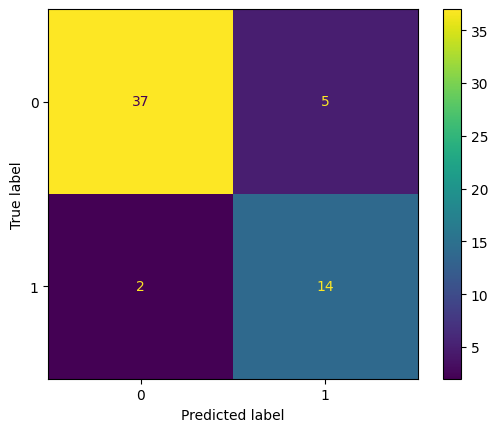

In [47]:
decisiontree, result_train_decisiontree, result_test_decisiontree = train_model(DecisionTreeClassifier(random_state=31), X_train, X_test, y_train, y_test)

In [48]:
crossval(decisiontree, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.8845766129032258


### Random Forest

Precision (train) : 1.0
Precision (test)  : 0.75
Recall (train)    : 1.0
Recall (test)     : 0.9375
F1-Score (train)  : 1.0
F1-Score (test)   : 0.8333333333333334
Auroc (train)     : 1.0
Auroc (test)      : 0.9092261904761905


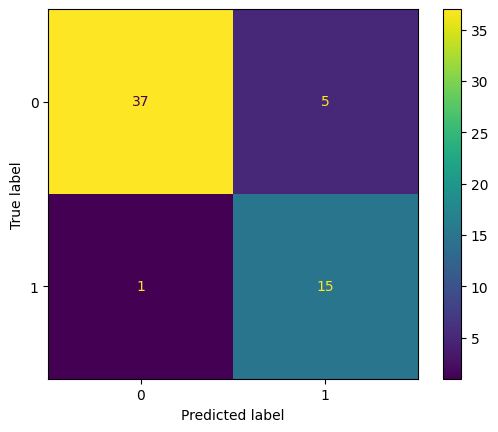

In [49]:
randomforest, result_train_randomforest, result_test_randomforest = train_model(RandomForestClassifier(random_state=3), X_train, X_test, y_train, y_test)

In [50]:
crossval(randomforest, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9729090790842871


### SVM

Precision (train) : 0.8914285714285715
Precision (test)  : 0.5925925925925926
Recall (train)    : 1.0
Recall (test)     : 1.0
F1-Score (train)  : 0.9425981873111783
F1-Score (test)   : 0.7441860465116279
Auroc (train)     : 0.9391025641025641
Auroc (test)      : 0.8690476190476191


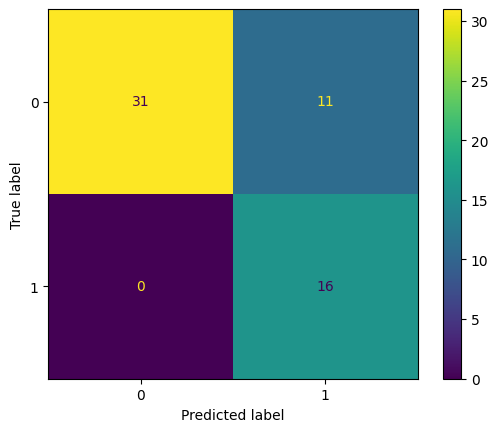

In [51]:
SVM, result_train_SVM, result_test_SVM = train_model(SVC(random_state=3), X_train, X_test, y_train, y_test)

In [52]:
crossval(SVM, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0009348033511423196
AUROC mean (cross-val train): 0.998921806451613
AUROC mean (cross-val test): 0.969504422476587


### K-Nearest Neighbors

Precision (train) : 0.8571428571428571
Precision (test)  : 0.5217391304347826
Recall (train)    : 0.9615384615384616
Recall (test)     : 0.75
F1-Score (train)  : 0.9063444108761329
F1-Score (test)   : 0.6153846153846153
Auroc (train)     : 0.9006410256410257
Auroc (test)      : 0.7440476190476191


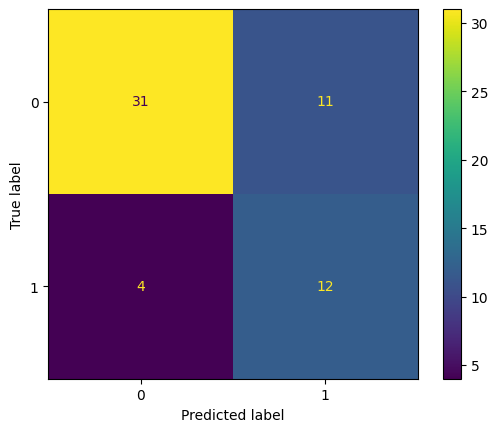

In [53]:
knn, result_train_knn, result_test_knn = train_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

In [54]:
crossval(knn, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0033135610571559462
AUROC mean (cross-val train): 0.9689976774193548
AUROC mean (cross-val test): 0.9132414151925078


### Gradient Boosting Classifier

Precision (train) : 1.0
Precision (test)  : 0.7647058823529411
Recall (train)    : 1.0
Recall (test)     : 0.8125
F1-Score (train)  : 1.0
F1-Score (test)   : 0.787878787878788
Auroc (train)     : 1.0
Auroc (test)      : 0.8586309523809523


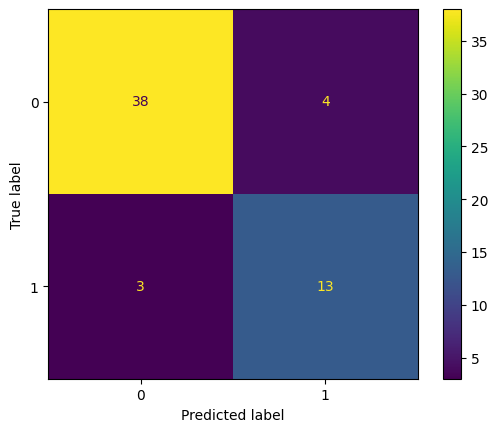

In [55]:
gbl, result_train_gbl, result_test_gbl = train_model(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

In [56]:
crossval(gbl, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9710197710718003


### Best Model

In [57]:
modelName = [
    'Decision Tree', 'Random Forest',
    'SVM', 'K-Nearest Neighbors', 
    'Gradient Boosting Classifier']
result_train = [[result_train_decisiontree[0], result_train_randomforest[0],result_train_SVM[0], result_train_knn[0], result_train_gbl[0]], 
          [result_train_decisiontree[1], result_train_randomforest[1],result_train_SVM[1], result_train_knn[1], result_train_gbl[1]],
          [result_train_decisiontree[2], result_train_randomforest[2],result_train_SVM[2], result_train_knn[2], result_train_gbl[2]],
          [result_train_decisiontree[3], result_train_randomforest[3],result_train_SVM[3], result_train_knn[3], result_train_gbl[3]]]
df_result_train = pd.DataFrame(result_train, columns=modelName, index=['Precision', 'Recall', 'F1-Score', 'Auroc'])
df_result_train

,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Gradient Boosting Classifier
Precision,1.0,1.0,0.891429,0.857143,1.0
Recall,1.0,1.0,1.000000,0.961538,1.0
F1-Score,1.0,1.0,0.942598,0.906344,1.0
Auroc,1.0,1.0,0.939103,0.900641,1.0


In [58]:
modelName = [
    'Decision Tree', 'Random Forest',
    'SVM', 'K-Nearest Neighbors', 
    'Gradient Boosting Classifier']
result_test = [[result_test_decisiontree[0], result_test_randomforest[0],result_test_SVM[0], result_test_knn[0], result_test_gbl[0]], 
          [result_test_decisiontree[1], result_test_randomforest[1],result_test_SVM[1], result_test_knn[1], result_test_gbl[1]],
          [result_test_decisiontree[2], result_test_randomforest[2],result_test_SVM[2], result_test_knn[2], result_test_gbl[2]],
          [result_test_decisiontree[3], result_test_randomforest[3],result_test_SVM[3], result_test_knn[3], result_test_gbl[3]]]
df_result_test = pd.DataFrame(result_test, columns=modelName, index=['Precision', 'Recall', 'F1-Score', 'Auroc'])
df_result_test

,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Gradient Boosting Classifier
Precision,0.736842,0.750000,0.592593,0.521739,0.764706
Recall,0.875000,0.937500,1.000000,0.750000,0.812500
F1-Score,0.800000,0.833333,0.744186,0.615385,0.787879
Auroc,0.877976,0.909226,0.869048,0.744048,0.858631


Based on the evaluation metrics such as AUC-ROC, precision, and recall, it has been observed that both the Decision Tree and Random Forest models exhibit the highest performance among the options considered. After comparing the cross-validation results, Random Forest decided as the best-performing model. The next step is to optimize its parameters to enhance overall performance.

### Hyperparameter Tuning

Precision (train) : 1.0
Precision (test)  : 0.7368421052631579
Recall (train)    : 1.0
Recall (test)     : 0.875
F1-Score (train)  : 1.0
F1-Score (test)   : 0.7999999999999999
Auroc (train)     : 1.0
Auroc (test)      : 0.8779761904761905


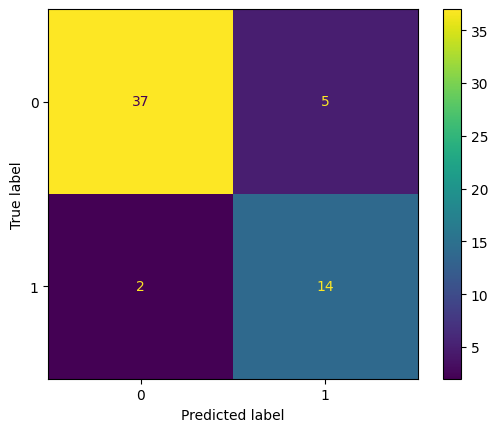

In [59]:
n_estimators = [int(x) for x in np.linspace(50, 500, 10)]
criterion = ['gini', 'entropy', 'log_loss', None]
max_features = ['sqrt', 'log2', None]
min_samples_split = [int(x) for x in np.linspace(1, 10, 10)]
hyperparameters_rfr = dict(n_estimators=n_estimators,
                                 criterion=criterion,
                                 max_features=max_features,
                                 min_samples_split=min_samples_split)
randomforestTuned, result_train_randomforest_Tuned, result_test_randomforest_Tuned = train_model(GridSearchCV(RandomForestClassifier(random_state=3), hyperparameters_rfr, scoring='roc_auc', cv=5), X_train, X_test, y_train, y_test)

In [60]:
randomforestTuned.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 350}

In [63]:
modelName = [
    'Random Forest', 'Random Forest Tuned']
result_test = [[result_test_randomforest[0], result_test_randomforest_Tuned[0]],
               [result_test_randomforest[1], result_test_randomforest_Tuned[1]],
               [result_test_randomforest[2], result_test_randomforest_Tuned[2]],
               [result_test_randomforest[3], result_test_randomforest_Tuned[3]]]
df_result_test = pd.DataFrame(result_test, columns=modelName, index=['Precision', 'Recall', 'F1-Score', 'Auroc'])
df_result_test

,Random Forest,Random Forest Tuned
Precision,0.750000,0.736842
Recall,0.937500,0.875000
F1-Score,0.833333,0.800000
Auroc,0.909226,0.877976


Following the tuning of the Random Forest, there was an unexpected decrease in performance. This could be attributed to the possibility that not all hyperparameters were thoroughly examined due to time constraints. So Random Forest is Still chosen as the Final Model. 

### Final Model

Precision (train) : 1.0
Precision (test)  : 0.75
Recall (train)    : 1.0
Recall (test)     : 0.9375
F1-Score (train)  : 1.0
F1-Score (test)   : 0.8333333333333334
Auroc (train)     : 1.0
Auroc (test)      : 0.9092261904761905


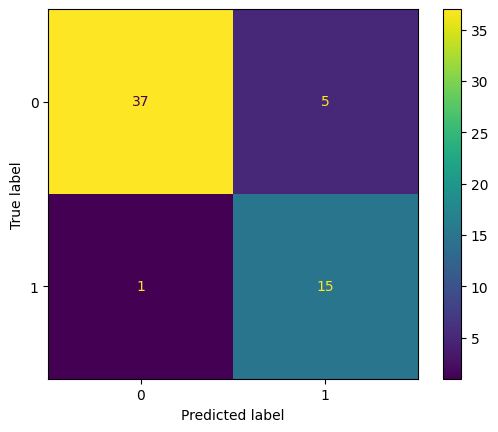

In [81]:
randomforest, result_train_randomforest, result_test_randomforest = train_model(RandomForestClassifier(random_state=3), X_train, X_test, y_train, y_test)

### Feature Importance

In [88]:
explainer = shap.Explainer(
    randomforest, X_train, feature_names=X_train.columns.to_list()
)
shap_values = explainer(X_test, check_additivity=False)

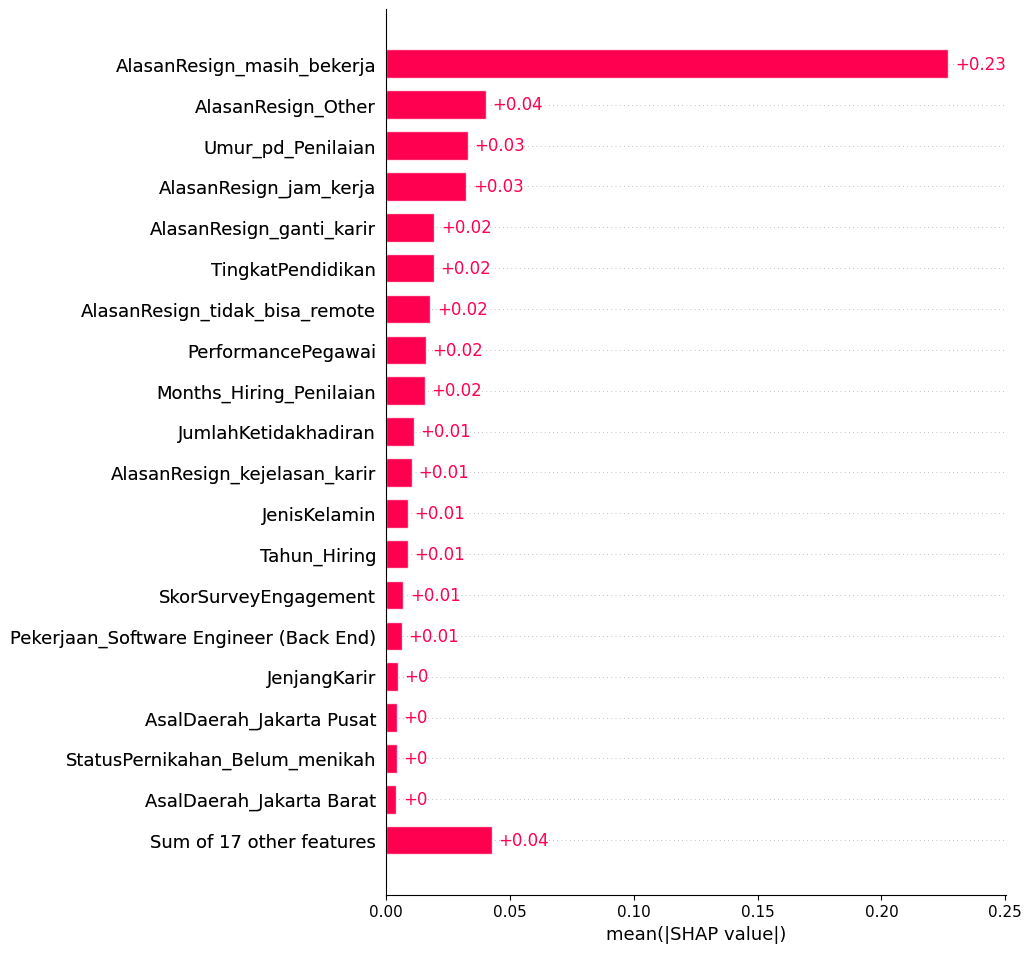

In [89]:
shap.plots.bar(shap_values[:, :, 1], max_display=20)

According to the analysis of Feature Importance, it appears that the factors contributing to employee resignations are likely associated with AlasanResign, Umur, TingkatPendidikan , PerformancePegawai, and Months_Hiring_Penilaian (Months between Hiring and Assessment).

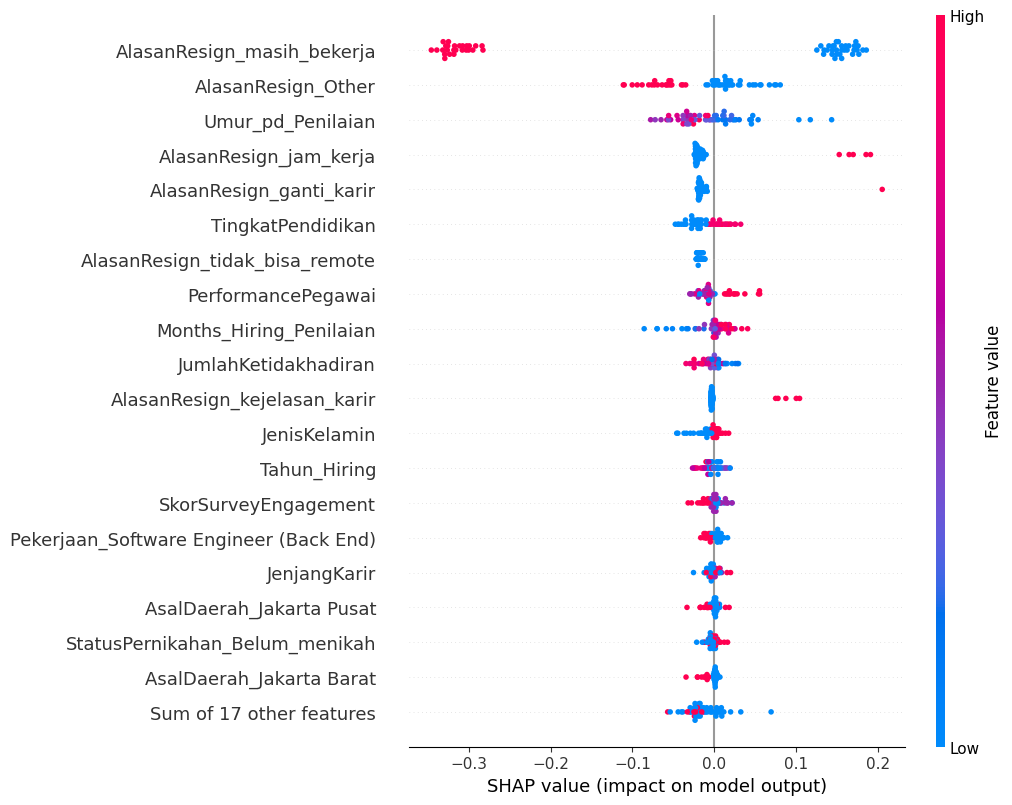

In [90]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=20)

The findings from the Beeswarm plot can be summarized as follows:
- Employee retention tends to increase with age, indicating that older employees are more likely to stay.
- Common reasons for employee resignation include dissatisfaction with working hours, a desire for a career change, and lack of clarity about career progression.
- Employees with higher levels of education are more prone to resign.
- There is an inverse relationship between employee performance and the likelihood of resignation; higher-performing employees are more likely to stay.
- A higher number of absences is associated with a greater likelihood of employees choosing to stay in the company.


---
# Business Recommendation
---

Based on the preceding steps and insights, it is observed that younger employees are more likely to resign, possibly due to their inclination to explore and find more suitable job opportunities. Therefore, creating a comfortable and positive work environment is crucial for the company's employee retention. The primary areas for improvement include:

1. **Flexibility of Working Hours:**
   - Addressing the main reason for employee resignations, which is working hours.
   - Offering flexibility, as long as job tasks are completed and the workload is balanced with reasonable working hours, can contribute to retaining employees.

2. **Clarity about Career Progression:**
   - Providing more detailed information about career progression, including aspects such as promotion criteria, tasks to be accomplished, and so on.
   - Enhancing transparency in career development can foster trust among employees and increase their commitment to the company.